## LETS GROWMORE -LGM_VIP-SEPT2021-DATA ANALYTICS

### Task:1-Iris Flowers Classification

### Author:Ram kumar sah 

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data
data=pd.read_csv("C:/Users/kumar/Downloads/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape      ## we have 150 rows and 6 columns

(150, 6)

In [4]:
data.info()    ## To check the datatype of each column and non-null elements present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()  ##Gives statstical information about data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].value_counts()    ##Provides information about species of each type along with their total number.


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
# dropping Id column
data.drop('Id', axis=1, inplace=True)

### Understanding the data

<AxesSubplot:>

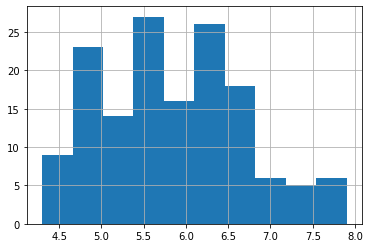

In [8]:
data['SepalLengthCm'].hist()

<AxesSubplot:>

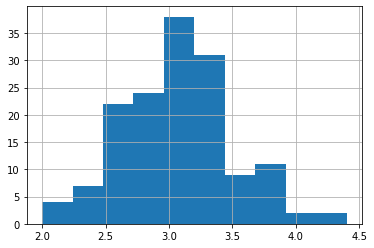

In [9]:
data['SepalWidthCm'].hist()

<AxesSubplot:>

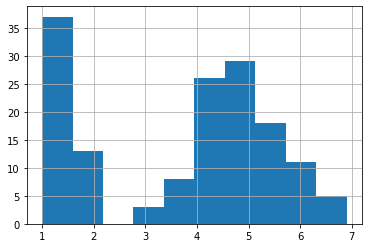

In [10]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

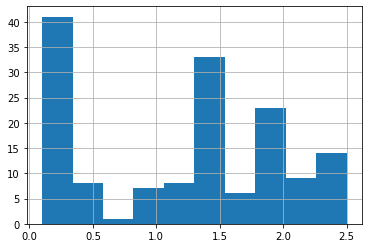

In [11]:
data['PetalWidthCm'].hist()

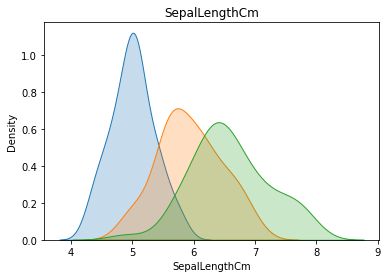

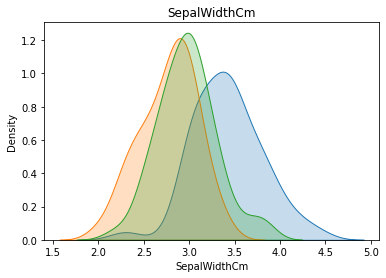

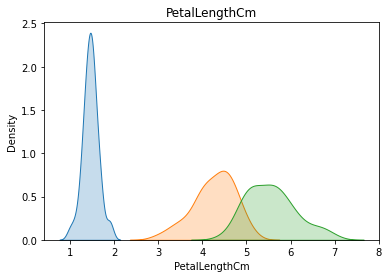

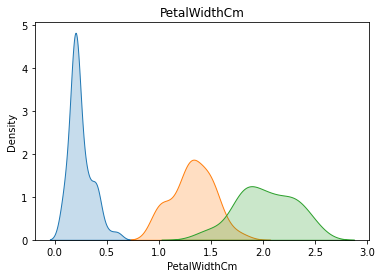

In [12]:
# Distributions of features by Species
for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()

In [13]:
## Correlation Matrix
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


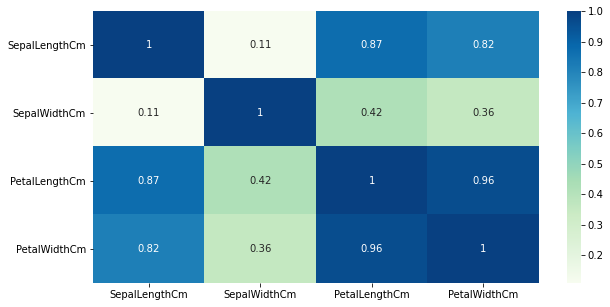

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
data['Value']=le.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


### Dividing the data for training and testing the model.We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(['Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [18]:
# Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

### Training the Algorithm

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

### Accuracy 

In [20]:
print("Accuracy :",model.score(X_test,y_test))

Accuracy : 1.0


In [21]:
## Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [22]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
print("Accuracy :",model.score(X_test,y_test))

Accuracy : 1.0


In [24]:
## Importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)
print("Accuracy :",model.score(X_test,y_test))

Accuracy : 1.0
